In [ ]:
# Forecasting model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno # To visualize missing value
import plotly.graph_objects as go # To Generate Graphs
import plotly.express as px # To Generate box plot for statistical representation
%matplotlib inline

In [ ]:
import zipfile
import requests
import os
from pathlib import Path

# Define the URL of the file you want to download
url_conflicts = "https://data.humdata.org/dataset/7b36830b-c033-4a06-b812-9940baec603b/resource/23755ad0-1d81-4b10-9e66-23b784ccd429/download/ukraine_hrp_civilian_targeting_events_and_fatalities_by_month-year_as-of-24nov2023.xlsx"
url_historical = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRMmUaCgM3NZHrHpewmiXQvPGJDy6dYQOFx1Of6TLxP4NgGHqTLVhwNcvVeVrEBRxo4E6JlGpPxcXhd/pub?gid=2128440595&single=true&output=csv"
url_latest = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRMmUaCgM3NZHrHpewmiXQvPGJDy6dYQOFx1Of6TLxP4NgGHqTLVhwNcvVeVrEBRxo4E6JlGpPxcXhd/pub?gid=0&single=true&output=csv"

resp_conflicts = requests.get(url_conflicts)
with open('test_conflicts.xls', 'wb') as output:
    output.write(resp_conflicts.content)

resp_historical = requests.get(url_historical)
with open('test_historical.csv', 'wb') as output:
    output.write(resp_historical.content)

resp_latest = requests.get(url_latest)
with open('test_latest.csv', 'wb') as output:
    output.write(resp_latest.content)

# Ukraine Conflict Events
conflict_events = pd.read_excel(open('test_conflicts.xls', 'rb'),sheet_name='Data')
# Ukraine Historical Figures
historical_figures = pd.read_csv('test_historical.csv')
# Ukraine Latest Figures
latest_figures = pd.read_csv('test_latest.csv')


# GlobalRelief: Historical Figures and Latest Figures

### Historical Figures Dataset

In [ ]:
historical_figures = historical_figures[historical_figures['crisis_name'] == 'Ukraine']
historical_figures.head(10)

,crisis_index,crisis_name,crisis_iso3,figure_name,figure_source,figure_value,figure_date,figure_url
15007,25,Ukraine,UKR,Ukrainian Refugees across Europe,UNHCR,85000,2022-04-25,https://data.unhcr.org/en/situations/ukraine
15008,25,Ukraine,UKR,Ukrainian Refugees across Europe,UNHCR,128300,2022-04-27,https://data.unhcr.org/en/situations/ukraine
15009,25,Ukraine,UKR,Ukrainian Refugees across Europe,UNHCR,165700,2022-05-03,https://data.unhcr.org/en/situations/ukraine
15010,25,Ukraine,UKR,Ukrainian Refugees across Europe,UNHCR,180700,2022-05-09,https://data.unhcr.org/en/situations/ukraine
15011,25,Ukraine,UKR,Ukrainian Refugees across Europe,UNHCR,180894,2022-05-18,https://data.unhcr.org/en/situations/ukraine
15012,25,Ukraine,UKR,Ukrainian Refugees across Europe,UNHCR,1005894,2022-05-21,https://data.unhcr.org/en/situations/ukraine
15013,25,Ukraine,UKR,Ukrainian Refugees across Europe,UNHCR,1143057,2022-05-23,https://data.unhcr.org/en/situations/ukraine
15014,25,Ukraine,UKR,Ukrainian Refugees across Europe,UNHCR,1252598,2022-05-24,https://data.unhcr.org/en/situations/ukraine
15015,25,Ukraine,UKR,Ukrainian Refugees across Europe,UNHCR,1509585,2022-05-25,https://data.unhcr.org/en/situations/ukraine
15016,25,Ukraine,UKR,Ukrainian Refugees across Europe,UNHCR,1542006,2022-05-26,https://data.unhcr.org/en/situations/ukraine


In [ ]:
del historical_figures['crisis_name']
del historical_figures['figure_url']
del historical_figures['crisis_iso3']
historical_figures.head(10)

,crisis_index,figure_name,figure_source,figure_value,figure_date
15007,25,Ukrainian Refugees across Europe,UNHCR,85000,2022-04-25
15008,25,Ukrainian Refugees across Europe,UNHCR,128300,2022-04-27
15009,25,Ukrainian Refugees across Europe,UNHCR,165700,2022-05-03
15010,25,Ukrainian Refugees across Europe,UNHCR,180700,2022-05-09
15011,25,Ukrainian Refugees across Europe,UNHCR,180894,2022-05-18
15012,25,Ukrainian Refugees across Europe,UNHCR,1005894,2022-05-21
15013,25,Ukrainian Refugees across Europe,UNHCR,1143057,2022-05-23
15014,25,Ukrainian Refugees across Europe,UNHCR,1252598,2022-05-24
15015,25,Ukrainian Refugees across Europe,UNHCR,1509585,2022-05-25
15016,25,Ukrainian Refugees across Europe,UNHCR,1542006,2022-05-26


In [ ]:
historical_figures.shape

(944, 5)

In [ ]:
historical_figures.describe()

,crisis_index,figure_value
count,944.0,9.440000e+02
mean,25.0,2.200265e+06
std,0.0,3.552860e+06
min,25.0,0.000000e+00
25%,25.0,1.784000e+03
50%,25.0,8.700000e+03
75%,25.0,5.146988e+06
max,25.0,1.770000e+07


In [ ]:
historical_figures.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 944 entries, 15007 to 15950
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   crisis_index   944 non-null    int64 
 1   figure_name    944 non-null    object
 2   figure_source  944 non-null    object
 3   figure_value   944 non-null    int64 
 4   figure_date    944 non-null    object
dtypes: int64(2), object(3)
memory usage: 44.2+ KB


In [ ]:
historical_figures.isnull().sum()

crisis_index     0
figure_name      0
figure_source    0
figure_value     0
figure_date      0
dtype: int64

In [ ]:
historical_figures['figure_name'].value_counts()

Ukrainian Refugees across Europe                            200
Civilians Killed since 24 Feb 2022                          150
Civilians Injured since 24 Feb 2022                         150
Civilian Casualties since 24 Feb 2022 (killed & injured)    150
Conflict-related Civilian Injuries (per month)               70
Conflict-related Civilian Deaths (per month)                 70
People Reached (per year)                                    41
People in Need                                               19
People Targeted for Assistance                               18
IDPs                                                         14
Returnees                                                    13
Children in Need                                             11
Humanitarian Access Incidents (per month)                    10
New Displacements by Conflict & Violence (per year)           8
Attacks on Health Care (per year)                             2
Attacks on Health Care: Deaths (per year

<ipython-input-10-ba9232fc4fec>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  civilians_killed['figure_date'] = pd.to_datetime(civilians_killed['figure_date'])
<ipython-input-10-ba9232fc4fec>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  civilians_injured['figure_date'] = pd.to_datetime(civilians_injured['figure_date'])
<ipython-input-10-ba9232fc4fec>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



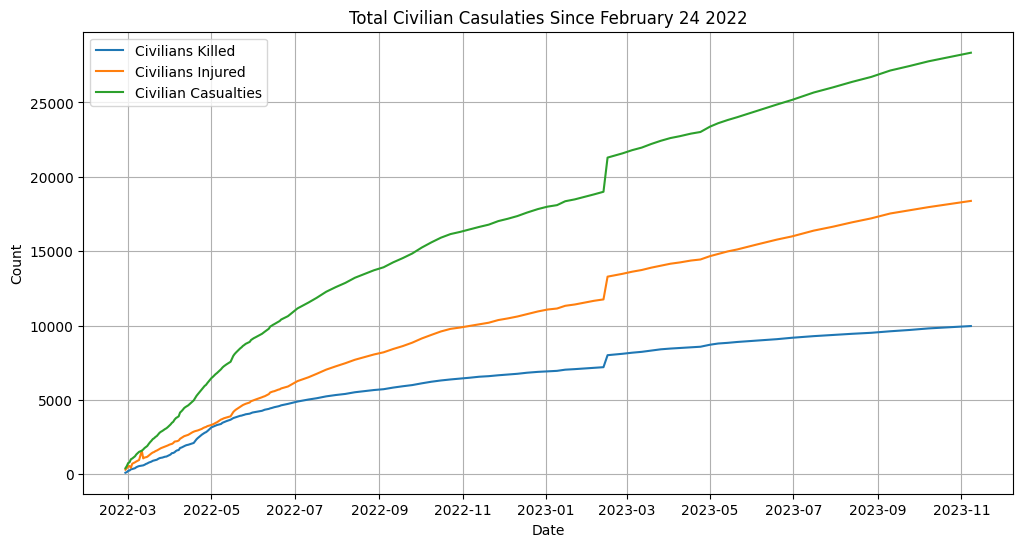

In [ ]:
# Filter the data for Civilians Killed/Injured/Casualties since 24 Feb 2022
civilians_killed = historical_figures[(historical_figures['figure_name'] == 'Civilians Killed since 24 Feb 2022') & (historical_figures['figure_date'] >= '2022-02-24')]
civilians_injured = historical_figures[(historical_figures['figure_name'] == 'Civilians Injured since 24 Feb 2022') & (historical_figures['figure_date'] >= '2022-02-24')]
civilian_casualties = historical_figures[(historical_figures['figure_name'] == 'Civilian Casualties since 24 Feb 2022 (killed & injured)') & (historical_figures['figure_date'] >= '2022-02-24')]

# Convert 'figure_date' to a datetime format
civilians_killed['figure_date'] = pd.to_datetime(civilians_killed['figure_date'])
civilians_injured['figure_date'] = pd.to_datetime(civilians_injured['figure_date'])
civilian_casualties['figure_date'] = pd.to_datetime(civilian_casualties['figure_date'])

# Create the time series graph
plt.figure(figsize=(12, 6))
plt.plot(civilians_killed['figure_date'], civilians_killed['figure_value'], label='Civilians Killed')
plt.plot(civilians_injured['figure_date'], civilians_injured['figure_value'], label='Civilians Injured')
plt.plot(civilian_casualties['figure_date'], civilian_casualties['figure_value'], label='Civilian Casualties')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Total Civilian Casulaties Since February 24 2022')
plt.legend()
plt.grid(True)
plt.show()

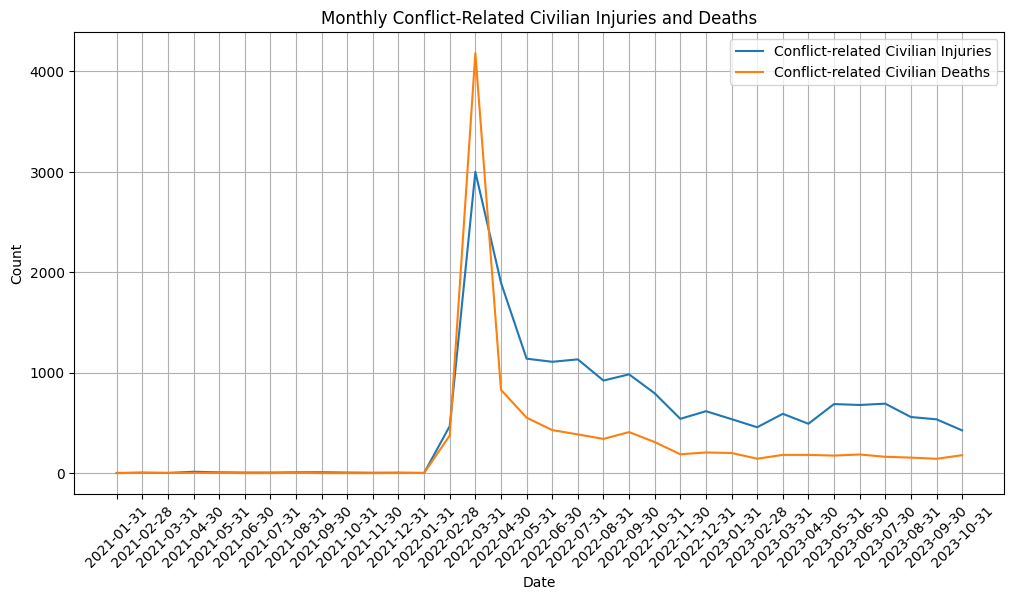

In [ ]:
# Filter the data for Civilians Killed/Injured/Casualties since 24 Feb 2022
conflict_injuries = historical_figures[(historical_figures['figure_name'] == 'Conflict-related Civilian Injuries (per month)') & (historical_figures['figure_date'] >= '2021-01-01')]
conflict_deaths = historical_figures[(historical_figures['figure_name'] == 'Conflict-related Civilian Deaths (per month)') & (historical_figures['figure_date'] >= '2021-01-01')]

# Create the time series graph
plt.figure(figsize=(12, 6))
plt.plot(conflict_injuries['figure_date'], conflict_injuries['figure_value'], label='Conflict-related Civilian Injuries')
plt.plot(conflict_deaths['figure_date'], conflict_deaths['figure_value'], label='Conflict-related Civilian Deaths')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Monthly Conflict-Related Civilian Injuries and Deaths')
plt.legend()
plt.grid(True)
plt.show()

### Latest Figures Dataset

In [ ]:
latest_figures = latest_figures[latest_figures['crisis_name'] == 'Ukraine']
latest_figures.head(100)

,crisis_index,crisis_name,crisis_iso3,figure_name,figure_source,figure_value,figure_date,figure_url
480,25,Ukraine,UKR,Ukrainian Refugees across Europe,UNHCR,5946000,2023-11-21,https://data.unhcr.org/en/situations/ukraine
481,25,Ukraine,UKR,IDPs,IOM,3674000,2023-09-25,https://reliefweb.int/node/4004775
482,25,Ukraine,UKR,Returnees,IOM,4573000,2023-09-25,https://reliefweb.int/node/4004775
483,25,Ukraine,UKR,Civilians Killed since 24 Feb 2022,OHCHR,9965,2023-11-08,https://reliefweb.int/node/4015522
484,25,Ukraine,UKR,Civilians Injured since 24 Feb 2022,OHCHR,18380,2023-11-08,https://reliefweb.int/node/4015522
485,25,Ukraine,UKR,Civilian Casualties since 24 Feb 2022 (killed ...,OHCHR,28345,2023-11-08,https://reliefweb.int/node/4015522
486,25,Ukraine,UKR,People Reached (per year),OCHA,10100000,2023-10-31,https://reliefweb.int/node/4016853
487,25,Ukraine,UKR,People in Need,OCHA,17600000,2023-10-03,https://reliefweb.int/node/4002368
488,25,Ukraine,UKR,People Targeted for Assistance,OCHA,11100000,2023-10-03,https://reliefweb.int/node/4002368
489,25,Ukraine,UKR,Children in Need,UNICEF,3200000,2022-10-19,https://reliefweb.int/node/3923368


In [ ]:
latest_figures.shape

(30, 8)

In [ ]:
latest_figures.describe()

,crisis_index,figure_value
count,30.0,3.000000e+01
mean,25.0,2.575988e+06
std,0.0,4.927622e+06
min,25.0,1.000000e+01
25%,25.0,2.087125e+04
50%,25.0,7.133250e+04
75%,25.0,2.711045e+06
max,25.0,1.760000e+07


In [ ]:
latest_figures.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 480 to 509
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   crisis_index   30 non-null     int64 
 1   crisis_name    30 non-null     object
 2   crisis_iso3    30 non-null     object
 3   figure_name    30 non-null     object
 4   figure_source  30 non-null     object
 5   figure_value   30 non-null     int64 
 6   figure_date    30 non-null     object
 7   figure_url     30 non-null     object
dtypes: int64(2), object(6)
memory usage: 2.1+ KB


In [ ]:
latest_figures.isnull().sum()

crisis_index     0
crisis_name      0
crisis_iso3      0
figure_name      0
figure_source    0
figure_value     0
figure_date      0
figure_url       0
dtype: int64

In [ ]:
latest_figures['figure_name'].value_counts()

Ukrainian Refugees across Europe                            1
IDPs                                                        1
Conflict-related Civilian Injuries (per month)              1
Conflict-related Civilian Deaths (per month)                1
Humanitarian Access Incidents (per month)                   1
Attacks on Health Care: Injuries (per year)                 1
Attacks on Health Care: Deaths (per year)                   1
Attacks on Health Care (per year)                           1
Ukrainian Refugees in the Russian Federation                1
Ukrainian Refugees in Belarus                               1
Ukrainian Refugees in Latvia                                1
Ukrainian Refugees in Estonia                               1
Ukrainian Refugees in Lithuania                             1
Ukrainian Refugees in Bulgaria                              1
Ukrainian Refugees in Hungary                               1
Ukrainian Refugees in Romania                               1
Ukrainia

# Ukraine Conflict Events: Civilian Targeting Events and Fatalities

In [ ]:
conflict_events.head(10)

,Country,Admin1,Admin2,ISO3,Admin2 Pcode,Admin1 Pcode,Month,Year,Events,Fatalities
0,Ukraine,Cherkasy,Cherkaskyi,UKR,UA7108,UA71,January,2018,0,0
1,Ukraine,Cherkasy,Cherkaskyi,UKR,UA7108,UA71,January,2018,0,0
2,Ukraine,Cherkasy,Cherkaskyi,UKR,UA7108,UA71,January,2018,0,0
3,Ukraine,Cherkasy,Cherkaskyi,UKR,UA7108,UA71,January,2018,0,0
4,Ukraine,Cherkasy,Cherkaskyi,UKR,UA7108,UA71,January,2018,0,0
5,Ukraine,Cherkasy,Cherkaskyi,UKR,UA7108,UA71,January,2018,0,0
6,Ukraine,Cherkasy,Cherkaskyi,UKR,UA7108,UA71,January,2018,0,0
7,Ukraine,Cherkasy,Cherkaskyi,UKR,UA7108,UA71,January,2018,0,0
8,Ukraine,Cherkasy,Cherkaskyi,UKR,UA7108,UA71,January,2018,0,0
9,Ukraine,Cherkasy,Cherkaskyi,UKR,UA7108,UA71,January,2018,0,0


In [ ]:
conflict_events.shape

(126664, 10)

In [ ]:
conflict_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126664 entries, 0 to 126663
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Country       126664 non-null  object
 1   Admin1        126664 non-null  object
 2   Admin2        126522 non-null  object
 3   ISO3          126664 non-null  object
 4   Admin2 Pcode  126522 non-null  object
 5   Admin1 Pcode  126522 non-null  object
 6   Month         126664 non-null  object
 7   Year          126664 non-null  int64 
 8   Events        126664 non-null  int64 
 9   Fatalities    126664 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 9.7+ MB


In [ ]:
conflict_events.describe

<bound method NDFrame.describe of         Country       Admin1        Admin2 ISO3 Admin2 Pcode Admin1 Pcode  \
0       Ukraine     Cherkasy    Cherkaskyi  UKR       UA7108         UA71   
1       Ukraine     Cherkasy    Cherkaskyi  UKR       UA7108         UA71   
2       Ukraine     Cherkasy    Cherkaskyi  UKR       UA7108         UA71   
3       Ukraine     Cherkasy    Cherkaskyi  UKR       UA7108         UA71   
4       Ukraine     Cherkasy    Cherkaskyi  UKR       UA7108         UA71   
...         ...          ...           ...  ...          ...          ...   
126659  Ukraine     Zhytomyr  Zhytomyrskyi  UKR       UA1804         UA18   
126660  Ukraine     Zhytomyr  Zhytomyrskyi  UKR       UA1804         UA18   
126661  Ukraine    Kyiv City          Kyiv  UKR       UA8000         UA80   
126662  Ukraine    Black Sea           NaN  UKR          NaN          NaN   
126663  Ukraine  Sea of Azov           NaN  UKR          NaN          NaN   

           Month  Year  Events  Fatalitie

In [ ]:
conflict_events.isnull().sum()

Country           0
Admin1            0
Admin2          142
ISO3              0
Admin2 Pcode    142
Admin1 Pcode    142
Month             0
Year              0
Events            0
Fatalities        0
dtype: int64

In [ ]:
admin1_cluster = conflict_events.Admin1.unique()

In [ ]:
conflict_events.Admin2.unique()

array(['Cherkaskyi', 'Umanskyi', 'Zolotoniskyi', 'Zvenyhorodskyi',
       'Chernihivskyi', 'Koriukivskyi', 'Nizhynskyi',
       'Novhorod-Siverskyi', 'Prylutskyi', 'Chernivetskyi',
       'Dnistrovskyi', 'Vyzhnytskyi', 'Bakhchysaraiskyi', 'Bilohirskyi',
       'Dzhankoiskyi', 'Feodosiiskyi', 'Kerchenskyi', 'Kurmanskyi',
       'Perekopskyi', 'Simferopolskyi', 'Yaltynskyi', 'Yevpatoriiskyi',
       'Dniprovskyi', 'Kamianskyi', 'Kryvorizkyi', 'Nikopolskyi',
       'Novomoskovskyi', 'Pavlohradskyi', 'Synelnykivskyi', 'Bakhmutskyi',
       'Donetskyi', 'Horlivskyi', 'Kalmiuskyi', 'Kramatorskyi',
       'Mariupolskyi', 'Pokrovskyi', 'Volnovaskyi', 'Ivano-Frankivskyi',
       'Kaluskyi', 'Kolomyiskyi', 'Kosivskyi', 'Nadvirnianskyi',
       'Verkhovynskyi', 'Bohodukhivskyi', 'Chuguivskyi', 'Iziumskyi',
       'Kharkivskyi', 'Krasnohradskyi', 'Kupianskyi', 'Lozivskyi',
       'Beryslavskyi', 'Henicheskyi', 'Kakhovskyi', 'Khersonskyi',
       'Skadovskyi', 'Kamianets-Podilskyi', 'Khmelnytskyi',

In [ ]:
conflict_events['Admin1 Pcode'].unique()

array(['UA71', 'UA74', 'UA73', 'UA01', 'UA12', 'UA14', 'UA26', 'UA63',
       'UA65', 'UA68', 'UA35', 'UA32', 'UA44', 'UA46', 'UA48', 'UA51',
       'UA53', 'UA56', 'UA59', 'UA61', 'UA05', 'UA07', 'UA21', 'UA23',
       'UA18', 'UA80', nan], dtype=object)

In [ ]:
conflict_events['Admin2 Pcode'].unique()

array(['UA7108', 'UA7106', 'UA7104', 'UA7102', 'UA7410', 'UA7402',
       'UA7404', 'UA7406', 'UA7408', 'UA7306', 'UA7304', 'UA7302',
       'UA0102', 'UA0104', 'UA0106', 'UA0118', 'UA0110', 'UA0112',
       'UA0114', 'UA0116', 'UA0120', 'UA0108', 'UA1202', 'UA1204',
       'UA1206', 'UA1208', 'UA1210', 'UA1212', 'UA1214', 'UA1402',
       'UA1408', 'UA1406', 'UA1410', 'UA1412', 'UA1414', 'UA1416',
       'UA1404', 'UA2604', 'UA2606', 'UA2608', 'UA2610', 'UA2612',
       'UA2602', 'UA6302', 'UA6314', 'UA6304', 'UA6312', 'UA6306',
       'UA6308', 'UA6310', 'UA6502', 'UA6504', 'UA6506', 'UA6510',
       'UA6508', 'UA6802', 'UA6804', 'UA6806', 'UA3502', 'UA3504',
       'UA3506', 'UA3508', 'UA3202', 'UA3204', 'UA3206', 'UA3208',
       'UA3214', 'UA3212', 'UA3210', 'UA4402', 'UA4404', 'UA4406',
       'UA4408', 'UA4416', 'UA4412', 'UA4414', 'UA4410', 'UA4612',
       'UA4602', 'UA4606', 'UA4608', 'UA4610', 'UA4614', 'UA4604',
       'UA4802', 'UA4806', 'UA4808', 'UA4804', 'UA5102', 'UA51

In [ ]:
conflict_events['Events'].unique()

array([  0,   1,   4,   2,   9,   7,   3,   6,   8,   5,  10,  43,  14,
        13,  28,  12,  37,  46,  25,  11, 128,  15,  39,  16,  21,  17,
        26,  45,  20,  27,  19,  31,  52,  34,  30,  23,  29,  18,  22,
        24,  35,  42])

In [ ]:
conflict_events['Fatalities'].unique()

array([  0,   1,   3,   4,   2,   6,   7,  20,   8,  30,  10,  19,   5,
        11, 175,  17,  38,   9, 474,  16, 158, 185,  14, 753, 103,  67,
        31,  28,  72,  15,  21,  37, 101,  13,  29,  60, 273,  44, 123,
        12,  26,  18,  23,  85,  53,  25,  22,  27,  33,  24,  69,  48,
        34,  46,  74,  62])

As you can see, this dataset contains null values for Admin2, Admin2 Pcode, and Admin1 Pcode, although no null values for Admin1. This will need to be addressed in EDA.

In [ ]:
admin1_data = conflict_events.groupby('Admin1').agg({'Events': 'sum', 'Fatalities': 'sum'}).reset_index()
admin1_data

,Admin1,Events,Fatalities
0,Black Sea,0,0
1,Cherkasy,344,378
2,Chernihiv,1842,4637
3,Chernivtsi,174,0
4,Crimea,1159,1001
5,Dnipropetrovsk,3257,3146
6,Donetsk,14361,16579
7,Ivano-Frankivsk,171,53
8,Kharkiv,11868,12998
9,Kherson,10908,7350


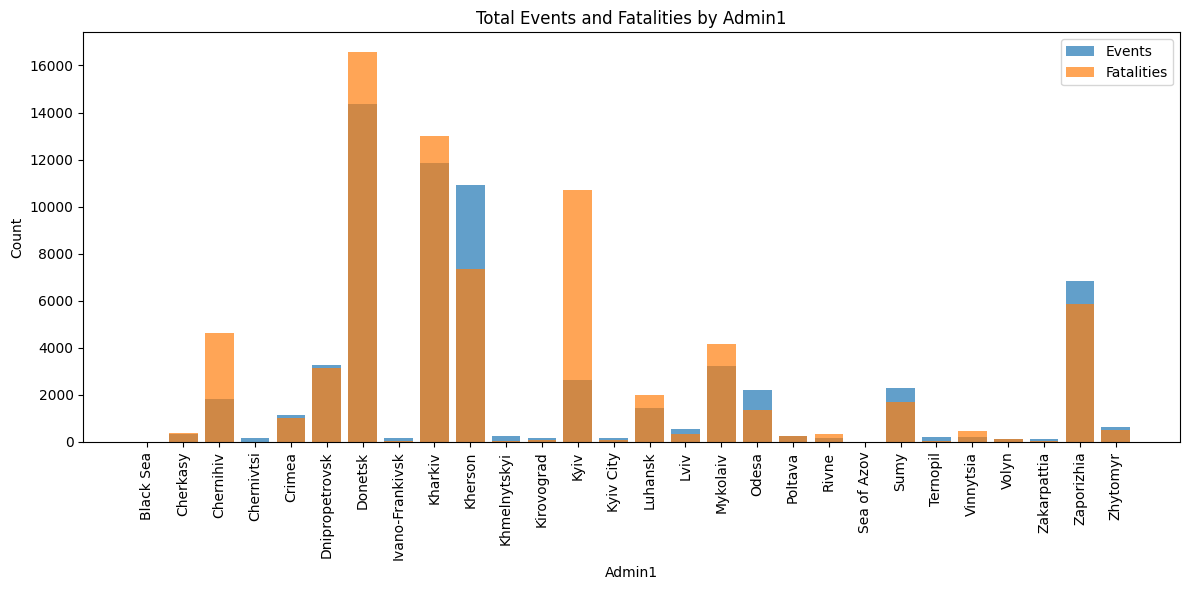

In [ ]:
# Total Events and Fatalities by Admin1 (oblast)
plt.figure(figsize=(12, 6))
plt.bar(admin1_data['Admin1'], admin1_data['Events'], label='Events', alpha=0.7)
plt.bar(admin1_data['Admin1'], admin1_data['Fatalities'], label='Fatalities', alpha=0.7)
plt.xlabel('Admin1')
plt.ylabel('Count')
plt.title('Total Events and Fatalities by Admin1')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
month_map = {
    'January': '01',
    'February': '02',
    'March': '03',
    'April': '04',
    'May': '05',
    'June': '06',
    'July': '07',
    'August': '08',
    'September': '09',
    'October': '10',
    'November': '11',
    'December': '12'
}

monthly_data = conflict_events.groupby(['Year', 'Month']).agg({'Events': 'sum', 'Fatalities': 'sum'}).reset_index()
monthly_data['Month'] = monthly_data['Month'].map(month_map)
monthly_data['Date'] = pd.to_datetime(monthly_data[['Year', 'Month']].assign(day=1))
monthly_data

,Year,Month,Events,Fatalities,Date
0,2018,04,201,46,2018-04-01
1,2018,08,169,17,2018-08-01
2,2018,12,139,26,2018-12-01
3,2018,02,192,9,2018-02-01
4,2018,01,158,5,2018-01-01
...,...,...,...,...,...
66,2023,03,2035,1475,2023-03-01
67,2023,05,2517,1400,2023-05-01
68,2023,11,1140,533,2023-11-01
69,2023,10,2096,1591,2023-10-01


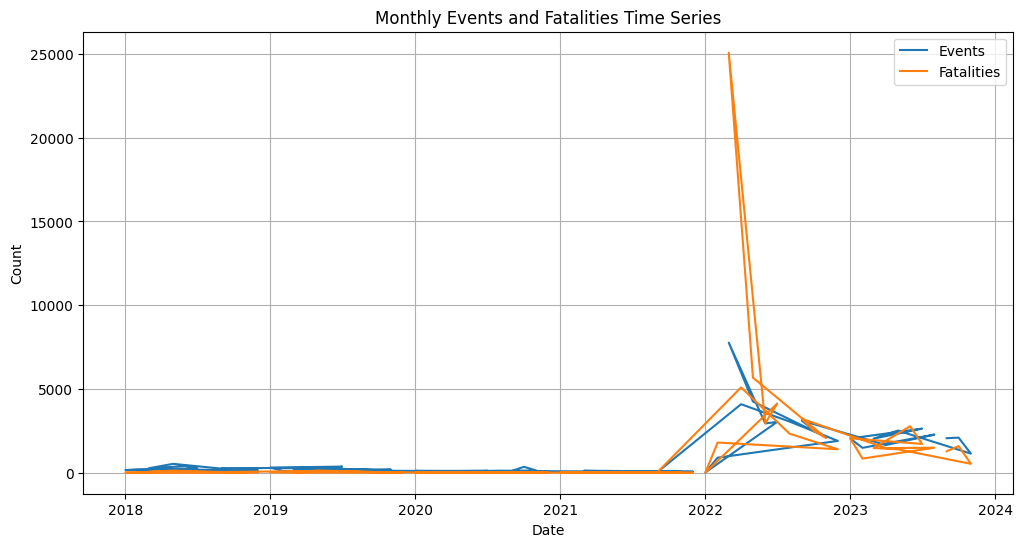

In [ ]:
# Create a time series graph
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['Date'], monthly_data['Events'], label='Events')
plt.plot(monthly_data['Date'], monthly_data['Fatalities'], label='Fatalities')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Monthly Events and Fatalities Time Series')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-33-cd0e95ea8fe1>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_events = monthly_data.pivot('Month', 'Year', 'Events')
<ipython-input-33-cd0e95ea8fe1>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_fatalities = monthly_data.pivot('Month', 'Year', 'Fatalities')


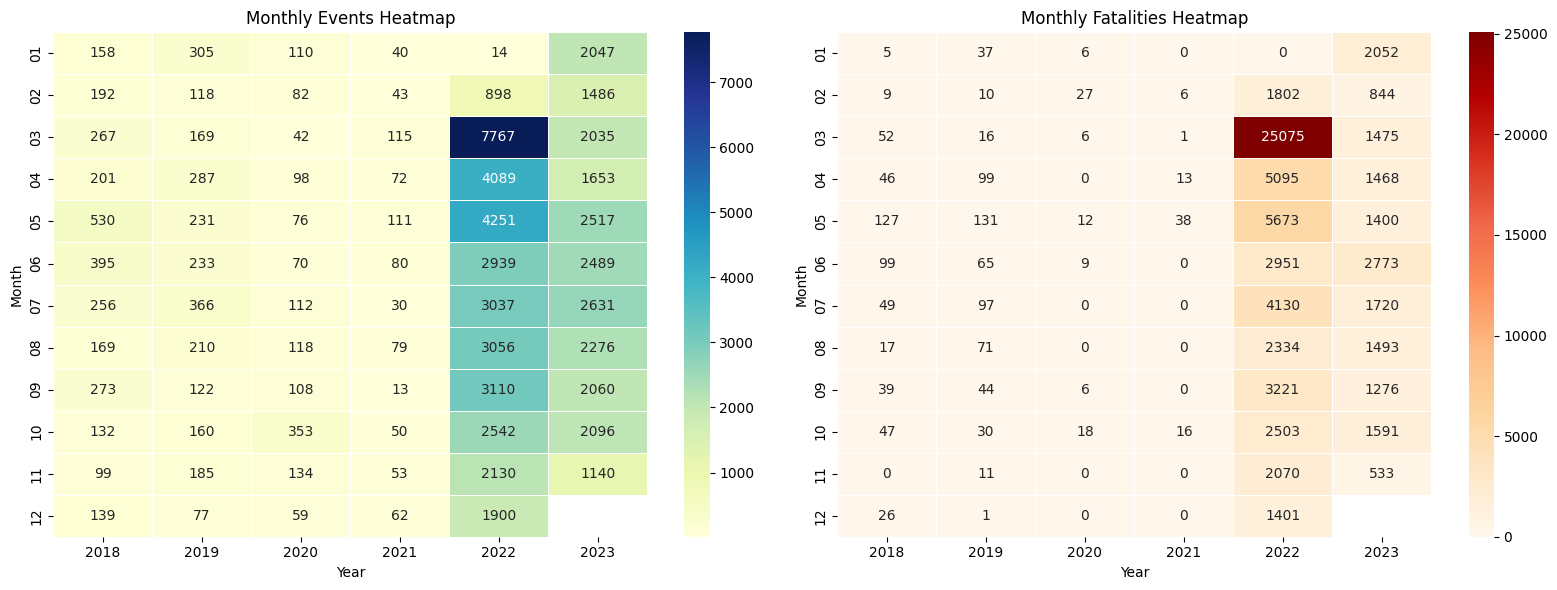

In [ ]:
# Pivot the data to create separate matrices for events and fatalities
heatmap_events = monthly_data.pivot('Month', 'Year', 'Events')
heatmap_fatalities = monthly_data.pivot('Month', 'Year', 'Fatalities')

# Create subplots for events and fatalities
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Create a heatmap for events
sns.heatmap(heatmap_events, cmap='YlGnBu', annot=True, fmt='g', linewidths=0.5, ax=ax[0])
ax[0].set_title('Monthly Events Heatmap')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Month')

# Create a heatmap for fatalities
sns.heatmap(heatmap_fatalities, cmap='OrRd', annot=True, fmt='g', linewidths=0.5, ax=ax[1])
ax[1].set_title('Monthly Fatalities Heatmap')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Month')

plt.tight_layout()
plt.show()

**Data Cleaning**

In [ ]:
# import requests
# url_conflicts = "https://data.humdata.org/dataset/7b36830b-c033-4a06-b812-9940baec603b/resource/e122ca1c-9463-4e3a-8731-8a85fab2a15e/download/ukraine_hrp_political_violence_events_and_fatalities_by_month-year_as-of-08nov2023.xlsx"
# resp_conflicts = requests.get(url_conflicts)
# with open('test_conflicts.xls', 'wb') as output:
#     output.write(resp_conflicts.content)
# # Ukraine Conflict Events
# conflict_events = pd.read_excel(open('test_conflicts.xls', 'rb'),sheet_name='Data')

In [ ]:
conflict_events.drop_duplicates(keep='last',inplace=True)
conflict_events.head()

,Country,Admin1,Admin2,ISO3,Admin2 Pcode,Admin1 Pcode,Month,Year,Events,Fatalities
25,Ukraine,Cherkasy,Cherkaskyi,UKR,UA7108,UA71,January,2018,0,0
37,Ukraine,Cherkasy,Umanskyi,UKR,UA7106,UA71,January,2018,0,0
48,Ukraine,Cherkasy,Zolotoniskyi,UKR,UA7104,UA71,January,2018,0,0
65,Ukraine,Cherkasy,Zvenyhorodskyi,UKR,UA7102,UA71,January,2018,0,0
85,Ukraine,Chernihiv,Chernihivskyi,UKR,UA7410,UA74,January,2018,0,0


In [ ]:
conflict_events.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9869 entries, 25 to 126663
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country       9869 non-null   object
 1   Admin1        9869 non-null   object
 2   Admin2        9727 non-null   object
 3   ISO3          9869 non-null   object
 4   Admin2 Pcode  9727 non-null   object
 5   Admin1 Pcode  9727 non-null   object
 6   Month         9869 non-null   object
 7   Year          9869 non-null   int64 
 8   Events        9869 non-null   int64 
 9   Fatalities    9869 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 848.1+ KB


In [ ]:
# admin 1 represents province, keep admin 2 remove unuseful features
conflict_events_0 = conflict_events[['Admin2','Month','Year','Events','Fatalities']]
conflict_events_0.head()

,Admin2,Month,Year,Events,Fatalities
25,Cherkaskyi,January,2018,0,0
37,Umanskyi,January,2018,0,0
48,Zolotoniskyi,January,2018,0,0
65,Zvenyhorodskyi,January,2018,0,0
85,Chernihivskyi,January,2018,0,0


In [ ]:
# admin 1 represents province
conflict_events_1 = conflict_events[['Admin1','Month','Year','Events','Fatalities']]
conflict_events_1.head()

,Admin1,Month,Year,Events,Fatalities
25,Cherkasy,January,2018,0,0
37,Cherkasy,January,2018,0,0
48,Cherkasy,January,2018,0,0
65,Cherkasy,January,2018,0,0
85,Chernihiv,January,2018,0,0


**One-hot Encoding**

In [ ]:
data = pd.get_dummies(conflict_events, columns=['Admin2'])
data.loc[(data['Events'] == 0) & (data['Fatalities'] == 0)] = 0
dataGroupByMonthYear= data.groupby(['Year','Month'],as_index=False).sum()

<ipython-input-39-8bc2c582c439>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataGroupByMonthYear= data.groupby(['Year','Month'],as_index=False).sum()


In [ ]:
data_1 = pd.get_dummies(conflict_events_1, columns=['Admin1'])
data_1.loc[(data_1['Events'] == 0) & (data_1['Fatalities'] == 0)] = 0
dataGroupByMonthYear_1= data_1.groupby(['Year','Month'],as_index=False).sum()

In [ ]:
month_map = {
    'January': '01',
    'February': '02',
    'March': '03',
    'April': '04',
    'May': '05',
    'June': '06',
    'July': '07',
    'August': '08',
    'September': '09',
    'October': '10',
    'November': '11',
    'December': '12'
}

agg_functions = {
    column: 'sum' if column not in ['Year', 'Month'] and (data['Events'] != 0).any() and (data['Fatalities'] != 0).any() else 'first'
    for column in data.columns
}
agg_functions.update({'Year': 'first', 'Month': 'first'})

result_df = data.groupby(['Year', 'Month'], as_index=False).agg(agg_functions)
result_df['Month'] = result_df['Month'].map(month_map)
result_df['Date'] = pd.to_datetime(result_df[['Year', 'Month']].assign(day=1))

# Reset the index
result_df = result_df.reset_index(drop=True)

# Drop 'Year' and 'Month'
result_df = result_df.drop(['Year', 'Month'], axis=1)

result_df.head()

,Country,Admin1,ISO3,Admin2 Pcode,Admin1 Pcode,Events,Fatalities,Admin2_Alchevskyi,Admin2_Bakhchysaraiskyi,Admin2_Bakhmutskyi,...,Admin2_Yaltynskyi,Admin2_Yavorivskyi,Admin2_Yevpatoriiskyi,Admin2_Zaporizkyi,Admin2_Zhmerynskyi,Admin2_Zhytomyrskyi,Admin2_Zolochivskyi,Admin2_Zolotoniskyi,Admin2_Zvenyhorodskyi,Date
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaT
1,UkraineUkraineUkraineUkraineUkraineUkraineUkra...,CrimeaDonetskDonetskDonetskDonetskKhersonKyivL...,UKRUKRUKRUKRUKRUKRUKRUKRUKRUKRUKRUKRUKRUKRUKR,UA0102UA1402UA1408UA1410UA1412UA6504UA3204UA44...,UA01UA14UA14UA14UA14UA65UA32UA44UA44UA51UA53UA...,25,10,0,1,1,...,0,0,0,1,0,0,0,0,0,2018-04-01
2,UkraineUkraineUkraineUkraineUkraineUkraineUkra...,CherkasyDnipropetrovskDonetskDonetskDonetskDon...,UKRUKRUKRUKRUKRUKRUKRUKRUKRUKRUKRUKRUKR,UA7108UA1208UA1408UA1406UA1410UA1414UA1416UA44...,UA71UA12UA14UA14UA14UA14UA14UA44UA44UA44UA51UA...,18,3,0,0,0,...,0,0,0,0,0,1,0,0,0,2018-08-01
3,UkraineUkraineUkraineUkraineUkraineUkraineUkra...,DnipropetrovskDonetskDonetskIvano-FrankivskKha...,UKRUKRUKRUKRUKRUKRUKRUKRUKRUKRUKRUKR,UA1206UA1408UA1416UA2604UA6312UA6510UA3206UA46...,UA12UA14UA14UA26UA63UA65UA32UA46UA46UA53UA61UA80,12,3,0,0,0,...,0,0,0,0,0,0,0,0,0,2018-12-01
4,UkraineUkraineUkraineUkraineUkraineUkraineUkra...,CrimeaCrimeaDonetskDonetskDonetskDonetskLuhans...,UKRUKRUKRUKRUKRUKRUKRUKRUKRUKR,UA0106UA0116UA1402UA1408UA1406UA1416UA4412UA51...,UA01UA01UA14UA14UA14UA14UA44UA51UA61UA80,16,1,0,0,1,...,0,0,0,0,0,0,0,0,0,2018-02-01


In [ ]:
agg_functions = {
    column: 'sum' if column not in ['Year', 'Month'] and (data_1['Events'] != 0).any() and (data_1['Fatalities'] != 0).any() else 'first'
    for column in data_1.columns
}
agg_functions.update({'Year': 'first', 'Month': 'first'})
result_df_1 = data_1.groupby(['Year', 'Month'], as_index=False).agg(agg_functions)
result_df_1['Month'] = result_df_1['Month'].map(month_map)
result_df_1['Date'] = pd.to_datetime(result_df_1[['Year', 'Month']].assign(day=1))

# Reset the index
result_df_1 = result_df_1.reset_index(drop=True)

# Drop 'Year' and 'Month'
result_df_1 = result_df_1.drop(['Year', 'Month'], axis=1)

result_df_1.head()

,Events,Fatalities,Admin1_Black Sea,Admin1_Cherkasy,Admin1_Chernihiv,Admin1_Chernivtsi,Admin1_Crimea,Admin1_Dnipropetrovsk,Admin1_Donetsk,Admin1_Ivano-Frankivsk,...,Admin1_Rivne,Admin1_Sea of Azov,Admin1_Sumy,Admin1_Ternopil,Admin1_Vinnytsia,Admin1_Volyn,Admin1_Zakarpattia,Admin1_Zaporizhia,Admin1_Zhytomyr,Date
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaT
1,25,10,0,0,0,0,1,0,4,0,...,0,0,0,0,0,0,0,3,0,2018-04-01
2,18,3,0,1,0,0,0,1,5,0,...,0,0,0,0,0,0,0,0,1,2018-08-01
3,12,3,0,0,0,0,0,1,2,1,...,0,0,0,1,0,0,0,0,0,2018-12-01
4,16,1,0,0,0,0,2,0,4,0,...,0,0,0,1,0,0,0,0,0,2018-02-01


In [ ]:
result_df_1 = result_df_1.sort_values(by='Date')
result_df_1.head()

,Events,Fatalities,Admin1_Black Sea,Admin1_Cherkasy,Admin1_Chernihiv,Admin1_Chernivtsi,Admin1_Crimea,Admin1_Dnipropetrovsk,Admin1_Donetsk,Admin1_Ivano-Frankivsk,...,Admin1_Rivne,Admin1_Sea of Azov,Admin1_Sumy,Admin1_Ternopil,Admin1_Vinnytsia,Admin1_Volyn,Admin1_Zakarpattia,Admin1_Zaporizhia,Admin1_Zhytomyr,Date
5,13,1,0,0,0,1,1,2,2,0,...,0,0,0,0,0,0,0,0,0,2018-01-01
4,16,1,0,0,0,0,2,0,4,0,...,0,0,0,1,0,0,0,0,0,2018-02-01
8,27,6,0,0,0,1,1,1,3,0,...,0,0,0,0,0,0,1,0,0,2018-03-01
1,25,10,0,0,0,0,1,0,4,0,...,0,0,0,0,0,0,0,3,0,2018-04-01
9,46,12,0,1,0,1,1,1,6,1,...,0,0,0,2,0,0,0,0,0,2018-05-01


In [ ]:
result_df_1[['Events','Fatalities']] = result_df_1[['Events','Fatalities']].cumsum()

In [ ]:
result_df_1.head()

,Events,Fatalities,Admin1_Black Sea,Admin1_Cherkasy,Admin1_Chernihiv,Admin1_Chernivtsi,Admin1_Crimea,Admin1_Dnipropetrovsk,Admin1_Donetsk,Admin1_Ivano-Frankivsk,...,Admin1_Rivne,Admin1_Sea of Azov,Admin1_Sumy,Admin1_Ternopil,Admin1_Vinnytsia,Admin1_Volyn,Admin1_Zakarpattia,Admin1_Zaporizhia,Admin1_Zhytomyr,Date
5,13,1,0,0,0,1,1,2,2,0,...,0,0,0,0,0,0,0,0,0,2018-01-01
4,29,2,0,0,0,0,2,0,4,0,...,0,0,0,1,0,0,0,0,0,2018-02-01
8,56,8,0,0,0,1,1,1,3,0,...,0,0,0,0,0,0,1,0,0,2018-03-01
1,81,18,0,0,0,0,1,0,4,0,...,0,0,0,0,0,0,0,3,0,2018-04-01
9,127,30,0,1,0,1,1,1,6,1,...,0,0,0,2,0,0,0,0,0,2018-05-01


**Model Development**

**ARIMA**

In [ ]:
data = result_df_1[['Events','Fatalities']]
data.index = result_df_1.Date

In [ ]:
train = data[:int(0.8*(len(data)))]
valid = data[int(0.8*(len(data))):]
train.shape,valid.shape

((57, 2), (15, 2))

In [ ]:
import statsmodels.api as sm

# Fit an ARIMA model
model = sm.tsa.arima.ARIMA(train['Fatalities'], order=(1, 0, 1))
model_fit = model.fit()

# Make predictions
forecast = model_fit.forecast(steps=len(valid))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [ ]:
# Evaluate the model (you can use different evaluation metrics)
forecast.index = valid['Fatalities'].index
mae = abs(forecast - valid['Fatalities']).mean()
mse = ((forecast - valid['Fatalities']) ** 2).mean()
rmse = mse ** 0.5

In [ ]:
mae,mse,rmse

(1472.8203978105544, 2776012.619508048, 1666.1370350328475)

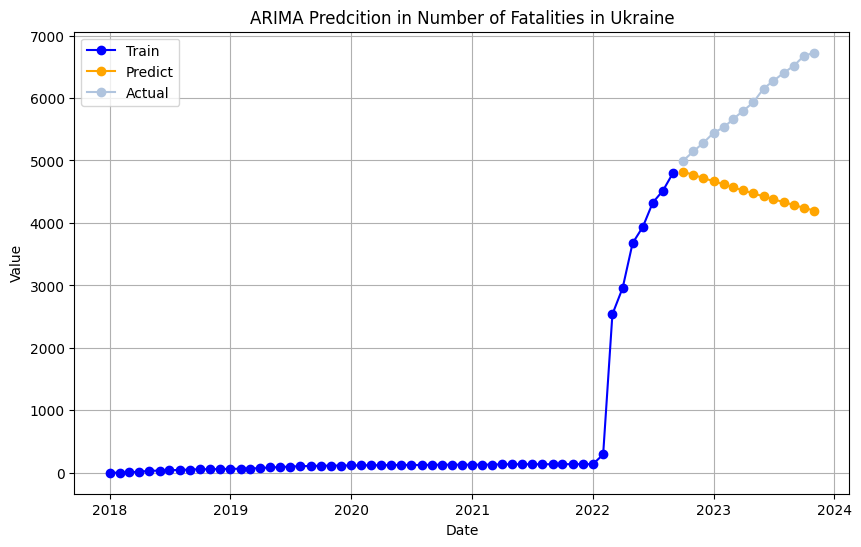

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(train['Fatalities'].index, train['Fatalities'], marker='o', linestyle='-', color = 'blue', label = 'Train')
plt.plot(forecast.index, forecast,marker='o', linestyle='-', color = 'orange', label = 'Predict')
plt.plot(valid['Fatalities'].index, valid['Fatalities'], marker='o', linestyle='-', color = 'lightsteelblue', label = 'Actual')
plt.title('ARIMA Predcition in Number of Fatalities in Ukraine')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

****

**SARIMA**

In [ ]:
# Fit a seasonal SARIMA model
order = (1, 0, 1)
seasonal_order = (1, 0, 1, 12)
sarima_model = sm.tsa.SARIMAX(train['Fatalities'], order=order, seasonal_order=seasonal_order)
sarima_model_fit = sarima_model.fit()

# Make predictions
sarima_forecast = sarima_model_fit.forecast(steps=len(valid))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertib

In [ ]:
# Evaluate the model (you can use different evaluation metrics)
sarima_forecast.index = valid['Fatalities'].index
mae = abs(sarima_forecast - valid['Fatalities']).mean()
mse = ((sarima_forecast - valid['Fatalities']) ** 2).mean()
rmse = mse ** 0.5

mae,mse,rmse

(1436.0637634884392, 2677768.8422412076, 1636.3889642261731)

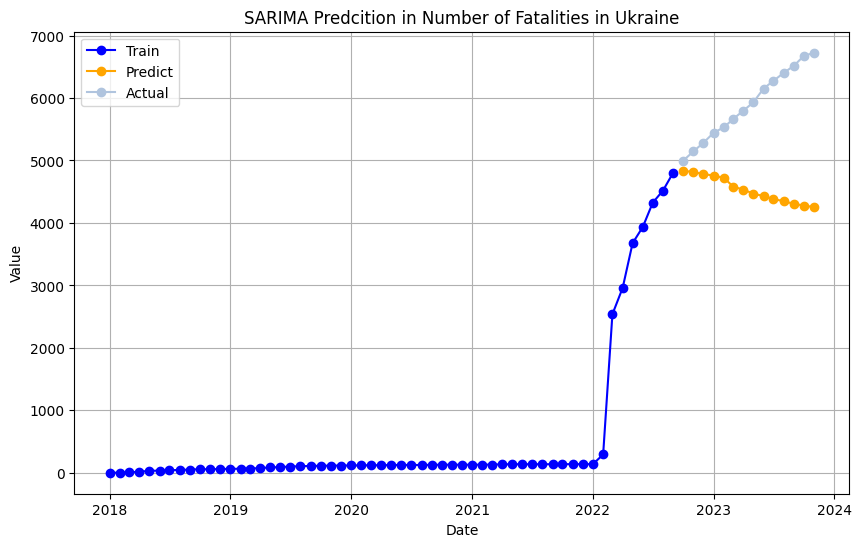

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(train['Fatalities'].index, train['Fatalities'], marker='o', linestyle='-', color = 'blue', label = 'Train')
plt.plot(sarima_forecast.index, sarima_forecast,marker='o', linestyle='-', color = 'orange', label = 'Predict')
plt.plot(valid['Fatalities'].index, valid['Fatalities'], marker='o', linestyle='-', color = 'lightsteelblue', label = 'Actual')
plt.title('SARIMA Predcition in Number of Fatalities in Ukraine')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()

**ARMA in Events**

In [ ]:
# Fit an ARIMA model
model = sm.tsa.arima.ARIMA(train['Events'], order=(1, 0, 1))
model_fit = model.fit()

# Make predictions
forecast = model_fit.forecast(steps=len(valid))
# Evaluate the model (you can use different evaluation metrics)
forecast.index = valid['Events'].index
mae = abs(forecast - valid['Events']).mean()
mse = ((forecast - valid['Events']) ** 2).mean()
rmse = mse ** 0.5
mae,mse,rmse

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


(1518.0024305779307, 3043597.5386667727, 1744.5909373451339)

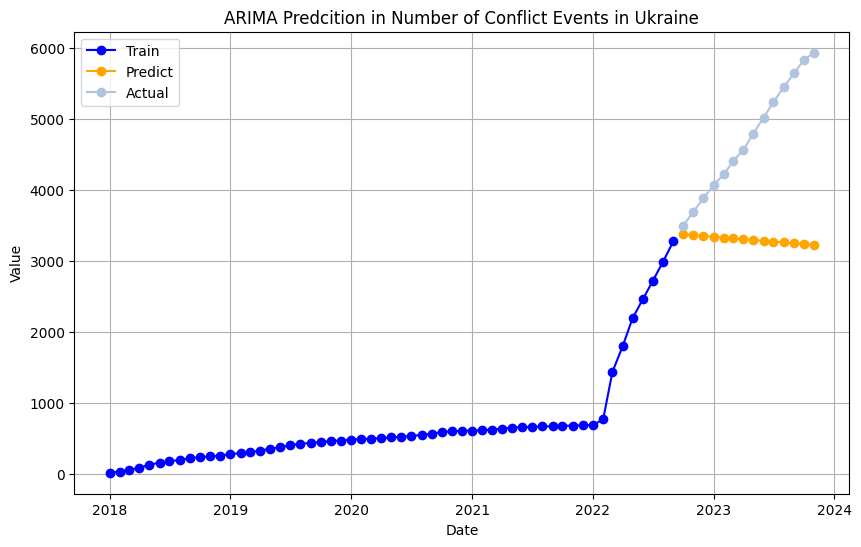

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(train['Events'].index, train['Events'], marker='o', linestyle='-', color = 'blue', label = 'Train')
plt.plot(forecast.index, forecast,marker='o', linestyle='-', color = 'orange', label = 'Predict')
plt.plot(valid['Events'].index, valid['Events'], marker='o', linestyle='-', color = 'lightsteelblue', label = 'Actual')
plt.title('ARIMA Predcition in Number of Conflict Events in Ukraine')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

**SARIMA in Events**

In [ ]:
# Fit a seasonal SARIMA model
order = (1, 0, 1)
seasonal_order = (1, 0, 1, 12)
sarima_model = sm.tsa.SARIMAX(train['Events'], order=order, seasonal_order=seasonal_order)
sarima_model_fit = sarima_model.fit()

# Make predictions
sarima_forecast = sarima_model_fit.forecast(steps=len(valid))

# Evaluate the model (you can use different evaluation metrics)
sarima_forecast.index = valid['Events'].index
mae = abs(sarima_forecast - valid['Events']).mean()
mse = ((sarima_forecast - valid['Events']) ** 2).mean()
rmse = mse ** 0.5

mae,mse,rmse

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertib

(1517.3988514311038, 3048558.005011501, 1746.0120288851108)

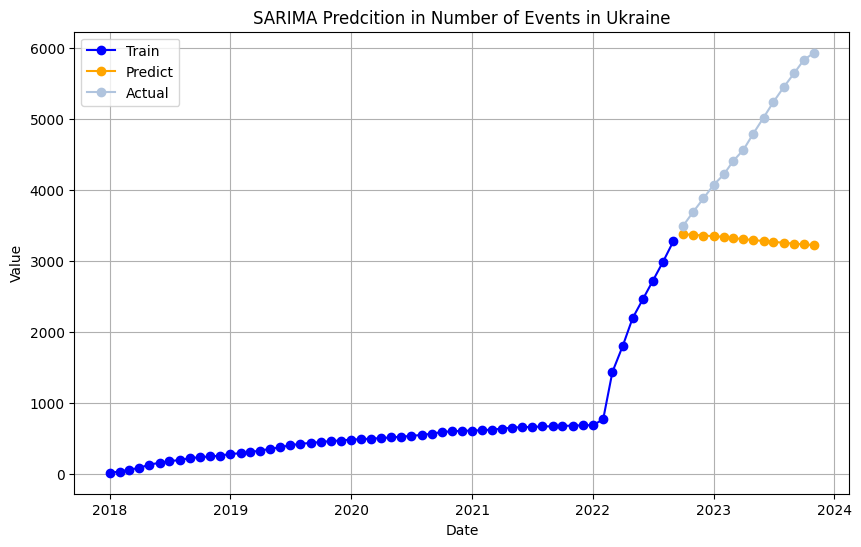

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(train['Events'].index, train['Events'], marker='o', linestyle='-', color = 'blue', label = 'Train')
plt.plot(sarima_forecast.index, sarima_forecast,marker='o', linestyle='-', color = 'orange', label = 'Predict')
plt.plot(valid['Events'].index, valid['Events'], marker='o', linestyle='-', color = 'lightsteelblue', label = 'Actual')
plt.title('SARIMA Predcition in Number of Events in Ukraine')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()

**Attempt in Cut Down Time Frame From Ukraine-Russia War**

In [ ]:
result_df_2 = result_df_1[result_df_1['Date']>= '2022-01-01']
result_df_2.head()

,Events,Fatalities,Admin1_Black Sea,Admin1_Cherkasy,Admin1_Chernihiv,Admin1_Chernivtsi,Admin1_Crimea,Admin1_Dnipropetrovsk,Admin1_Donetsk,Admin1_Ivano-Frankivsk,...,Admin1_Rivne,Admin1_Sea of Azov,Admin1_Sumy,Admin1_Ternopil,Admin1_Vinnytsia,Admin1_Volyn,Admin1_Zakarpattia,Admin1_Zaporizhia,Admin1_Zhytomyr,Date
53,684,138,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2022-01-01
52,764,293,0,0,4,0,0,1,5,0,...,0,0,4,0,0,0,0,2,0,2022-02-01
56,1433,2538,0,0,5,0,0,4,7,0,...,1,0,4,0,1,1,0,5,3,2022-03-01
49,1797,2960,0,0,3,0,2,5,7,0,...,0,0,4,0,3,0,0,5,0,2022-04-01
57,2191,3675,0,0,2,0,1,4,8,0,...,0,0,3,0,0,0,0,5,1,2022-05-01


In [ ]:
data1 = result_df_2[['Events','Fatalities']]
data1.index = result_df_2.Date

In [ ]:
train = data1[:int(0.8*(len(data1)))]
valid = data1[int(0.8*(len(data1))):]
train.shape,valid.shape

((18, 2), (5, 2))

**Revised ARIMA in Number of Fatalities**

In [ ]:
# Fit an ARIMA model
model = sm.tsa.arima.ARIMA(train['Fatalities'], order=(1, 0, 1))
model_fit = model.fit()

# Make predictions
forecast = model_fit.forecast(steps=len(valid))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
# Evaluate the model (you can use different evaluation metrics)
forecast.index = valid['Fatalities'].index
mae = abs(forecast - valid['Fatalities']).mean()
mse = ((forecast - valid['Fatalities']) ** 2).mean()
rmse = mse ** 0.5

mae,mse,rmse

(511.4782457181997, 328904.04245995387, 573.5015627354069)

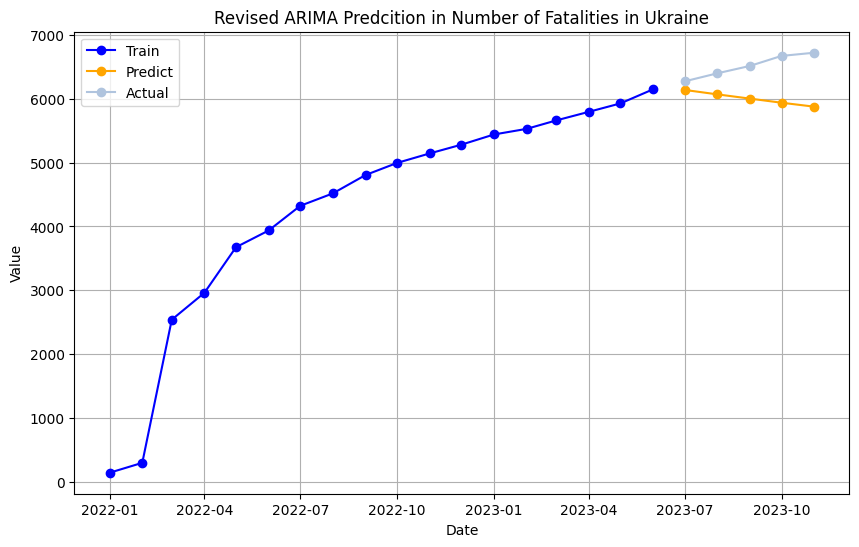

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(train['Fatalities'].index, train['Fatalities'], marker='o', linestyle='-', color = 'blue', label = 'Train')
plt.plot(forecast.index, forecast,marker='o', linestyle='-', color = 'orange', label = 'Predict')
plt.plot(valid['Fatalities'].index, valid['Fatalities'], marker='o', linestyle='-', color = 'lightsteelblue', label = 'Actual')
plt.title('Revised ARIMA Predcition in Number of Fatalities in Ukraine')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Fit an ARIMA model
model = sm.tsa.arima.ARIMA(train['Events'], order=(1, 0, 1))
model_fit = model.fit()

# Make predictions
forecast = model_fit.forecast(steps=len(valid))
# Evaluate the model (you can use different evaluation metrics)
forecast.index = valid['Events'].index
mae = abs(forecast - valid['Events']).mean()
mse = ((forecast - valid['Events']) ** 2).mean()
rmse = mse ** 0.5
mae,mse,rmse

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(615.7107367894723, 465915.0404859345, 682.5796953366944)

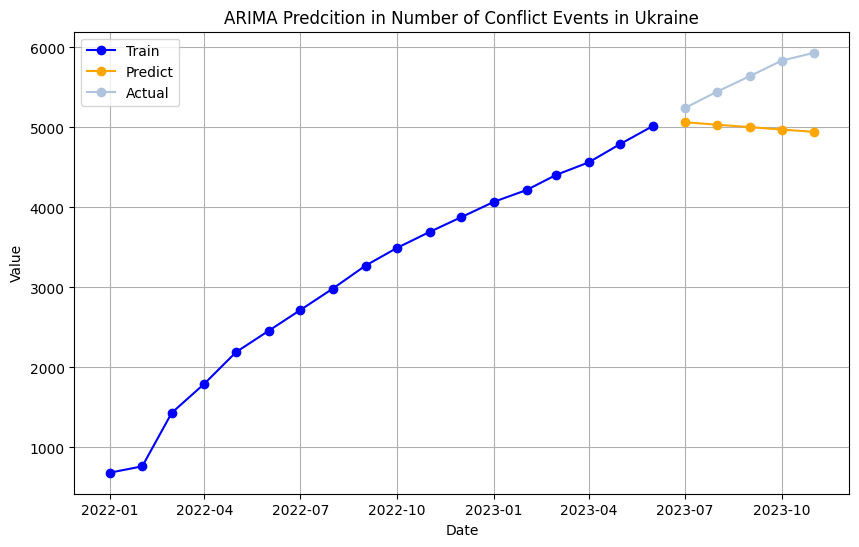

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(train['Events'].index, train['Events'], marker='o', linestyle='-', color = 'blue', label = 'Train')
plt.plot(forecast.index, forecast,marker='o', linestyle='-', color = 'orange', label = 'Predict')
plt.plot(valid['Events'].index, valid['Events'], marker='o', linestyle='-', color = 'lightsteelblue', label = 'Actual')
plt.title('ARIMA Predcition in Number of Conflict Events in Ukraine')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

**Revised ARIMA in Number of Events**

In [ ]:
# Fit an ARIMA model
model = sm.tsa.arima.ARIMA(train['Events'], order=(1, 0, 1))
model_fit = model.fit()

# Make predictions
forecast = model_fit.forecast(steps=len(valid))
# Evaluate the model (you can use different evaluation metrics)
forecast.index = valid['Events'].index
mae = abs(forecast - valid['Events']).mean()
mse = ((forecast - valid['Events']) ** 2).mean()
rmse = mse ** 0.5
mae,mse,rmse

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(615.7107367894723, 465915.0404859345, 682.5796953366944)

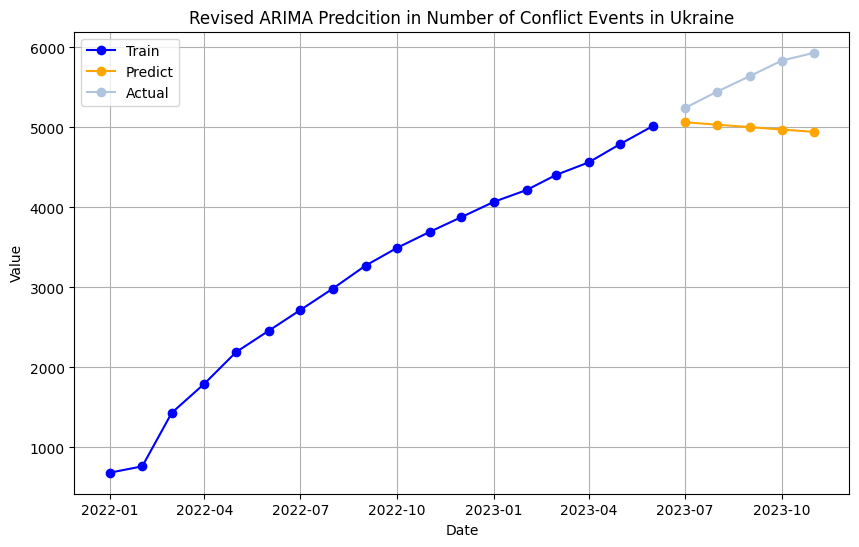

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(train['Events'].index, train['Events'], marker='o', linestyle='-', color = 'blue', label = 'Train')
plt.plot(forecast.index, forecast,marker='o', linestyle='-', color = 'orange', label = 'Predict')
plt.plot(valid['Events'].index, valid['Events'], marker='o', linestyle='-', color = 'lightsteelblue', label = 'Actual')
plt.title('Revised ARIMA Predcition in Number of Conflict Events in Ukraine')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

**Revised SARIMA in Number of Events**

In [ ]:
# Fit a seasonal SARIMA model
order = (1, 0, 1)
seasonal_order = (1, 0, 1, 12)
sarima_model = sm.tsa.SARIMAX(train['Events'], order=order, seasonal_order=seasonal_order)
sarima_model_fit = sarima_model.fit()

# Make predictions
sarima_forecast = sarima_model_fit.forecast(steps=len(valid))

# Evaluate the model (you can use different evaluation metrics)
sarima_forecast.index = valid['Events'].index
mae = abs(sarima_forecast - valid['Events']).mean()
mse = ((sarima_forecast - valid['Events']) ** 2).mean()
rmse = mse ** 0.5

mae,mse,rmse

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


(301.0246236895722, 112718.22343999229, 335.73534731986786)

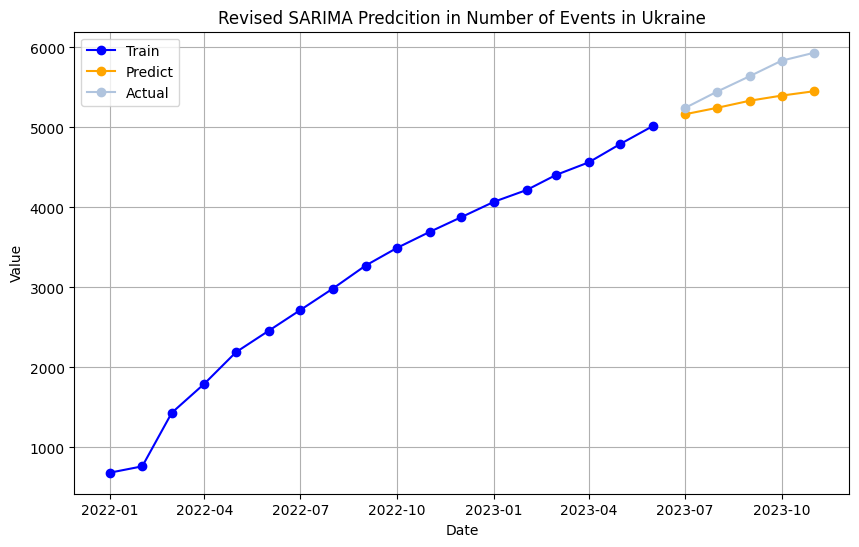

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(train['Events'].index, train['Events'], marker='o', linestyle='-', color = 'blue', label = 'Train')
plt.plot(sarima_forecast.index, sarima_forecast,marker='o', linestyle='-', color = 'orange', label = 'Predict')
plt.plot(valid['Events'].index, valid['Events'], marker='o', linestyle='-', color = 'lightsteelblue', label = 'Actual')
plt.title('Revised SARIMA Predcition in Number of Events in Ukraine')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
order = (1, 0, 1)
seasonal_order = (1, 0, 1, 12)
sarima_model = sm.tsa.SARIMAX(train['Fatalities'], order=order, seasonal_order=seasonal_order)
sarima_model_fit = sarima_model.fit()

# Make predictions
sarima_forecast = sarima_model_fit.forecast(steps=len(valid))
# Evaluate the model (you can use different evaluation metrics)
sarima_forecast.index = valid['Fatalities'].index
mae = abs(sarima_forecast - valid['Fatalities']).mean()
mse = ((sarima_forecast - valid['Fatalities']) ** 2).mean()
rmse = mse ** 0.5

mae,mse,rmse

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/bas

(455.9732150878497, 265903.00236909126, 515.657834585194)

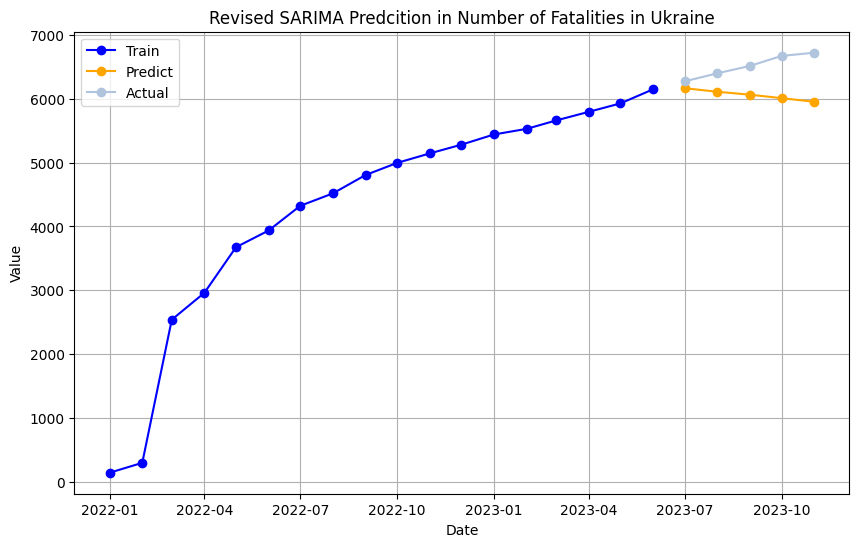

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(train['Fatalities'].index, train['Fatalities'], marker='o', linestyle='-', color = 'blue', label = 'Train')
plt.plot(sarima_forecast.index, sarima_forecast,marker='o', linestyle='-', color = 'orange', label = 'Predict')
plt.plot(valid['Fatalities'].index, valid['Fatalities'], marker='o', linestyle='-', color = 'lightsteelblue', label = 'Actual')
plt.title('Revised SARIMA Predcition in Number of Fatalities in Ukraine')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()